In [1]:
%load_ext notexbook

%texify

# Fitting data

The process of _making sense to data_ (or _extracting information from data_) using computer algorithms is called *machine learning*.

**Machine learning** is a very large field, and covers a whole host of techniques. 


In this course we will be discovering a few of them but let's first start with the simplet possible example:  the *linear fit*

## Input data

First we shall need some data. For this example we shall be pretending that we have measured these data from an experiment and we want to extract the underlying parameters of the system that generated them.

I have prepared a CSV file which you can read into pandas using `read_csv`:

In [2]:
import pandas as pd

data = pd.read_csv("linear.csv")
data.head()

,x,y
0,3.745401,3.229269
1,9.507143,14.185654
2,7.319939,9.524231
3,5.986585,6.672066
4,1.560186,-3.358149


We can see here that the data has two columns, `x` and `y`. 

Traditionally, $x$ is used for the things we **measure** in the world and use as inputs, and $y$ is used for the thing we want to **predict**. 

In our case, we want to work out what the value of $y$ should be for any given $x$.

In this case we have one single $x$ column but in a more complicated data set we may have multiple $x_1$, $x_2$ etc. in which case the set together is sometimes given the upper-case letter $X$. 

(**ML terms**) Each $x_n$ column is called a *feature*. Features are usually things that you have measured as part of a experiment (e.g. _height of a person_, _temperature of a room_, _size of a garden_ etc.).

Our $y$ column is the thing that we are going to create a model to predict the value of. 

(**ML terms**) The $y$ column of the input data is often called the *label* or the *target*.

Let's check how many rows we have:

In [3]:
data.count()

x    50
y    50
dtype: int64

We have 50 rows here. 

(**ML terms**) In the input data, each row is often called a *sample* (though sometimes also called an *instance*, *example* or *observation*). For example, it could be the information about a single person from a census or the measurements at a particular time from a weather station.

Let's have a look at what the data looks like when plotted:

<AxesSubplot:xlabel='x', ylabel='y'>

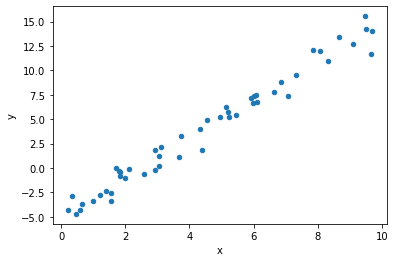

In [4]:
data.plot.scatter("x", "y")

We can clearly visually see here that there is a linear relationship between the $x$ and $y$ values but we need to be able to extract the exact parameters programmatically.

## Linear regression

#### Preamble

For this particular case, we will be using the implementation of a Linear Regression Algorithm as available in the [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.html) pakage, i.e. [`scipy.stats.linregress`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html).

When we will get into other machine learning techniques in this course, we will be using instead [scikit-learn](http://scikit-learn.org/). 

`sklearn` provides a whole host of tools for studying data. You may also want to investigate [statsmodels](https://www.statsmodels.org) which also provides a large number of tools for statistical exploration.

In [5]:
from scipy.stats import linregress

### Fitting the data

Once we have created our model, we can fit it to the data by calling the `fit()` method on it. This takes two arguments:

1. The input data as a *two-dimensional* structure of the size $(N_{samples}, N_{features})$.
2. The labels or targets of the data as a *one-dimensional* data structure of size $(N_{samples})$.

**Note** A more thorough explanation about ML Data Representation later!

**Note 2**: If you're using pandas to store your data (as we are) then just remember that the first argument should be a `DataFrame` and the second should be a `Series`.

In [6]:
x = data["x"].to_numpy()
y = data["y"].to_numpy()

print(x.shape, y.shape)

(50,) (50,)


In [7]:
model = linregress(x, y)

In [8]:
type(model)

scipy.stats._stats_mstats_common.LinregressResult

In [9]:
print(f"Model Slope: {model.slope}") 
print(f"Model Intercept: {model.intercept}")

Model Slope: 1.97765660038531
Model Intercept: -4.903310725531111


The equation that we have extracted can therefore be represented as:

$$y = 1.97 x - 4.90$$

The original data was produced (with random wobble applied) from a straight line with gradient $2$ and y-intercept of $-5$. Our model has managed to predict values very close to the original.

If you want to, you can see [the code that generated the original data](aside_generate_linear_data.ipynb).

### Making predictions using the model

Once we've performed the fit, we can use the parameter of the model (i.e. `intercept` and `slope`) to generate **predictions** on new data points which weren't part of the original data set.

We can use this to plot the fit over the original data to compare the result. By getting the predicted $y$ values for the minimum and maximum $x$ values, we can plot a straight line between them to visualise the model.

In [10]:
import numpy as np

x_fit = np.asarray([0, 10])
y_pred = x_fit * model.slope + model.intercept

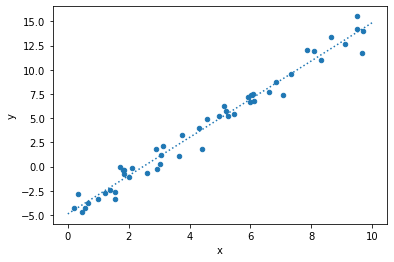

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
data.plot.scatter("x", "y", ax=ax)
ax.plot(x_fit, y_pred, linestyle=":")
plt.show()

## Introducing `sklearn`

[Scikit-learn](https://scikit-learn.org) is the _de-facto_ standard package for Machine Learning in Python.

`sklearn` provides an extensive (**but consistent**) Object-Oriented API for Machine Learning in Python, offering support for multiple data formats, and a vast majority of methods (_more on this in the next notebook_)

### Linear Regression Model using `sklearn`

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

The `model` object is of type `Estimator` (i.e. the Estimator Object). Each `Estimator` exposes a consistent API that is shared among all the supported ML methods.

**Note** This is the _aforementioned_ API Consistency which is one of the key feature of `sklearn`.

Each estimator expects data to be in the _standard ML form_, that is $X$, `2D-array`, and $y$ as the array of _targets_. 

**Note**: We will expand a bit more about ML Data representation, later!

In [13]:
X = data[["x"]]  # note: the double bracket adds an extra dimension, as sklearn expects data in the canonica form X, y
y = data["y"]

print(X.shape, y.shape)

(50, 1) (50,)


Each `Estimator` object has the `.fit` method which is (intuitively) going to **fit** the model to the data. This method returns the same model, with the (internal) parameters updated, as a result of the fitting process. 

In [14]:
model = model.fit(X, y)

In [15]:
print(f"Model Slope: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")

Model Slope: [1.9776566]
Model Intercept: -4.903310725531115


**Note** As per convention, all the _parameters_ of the model are named with an ending underscore in their name.

To generate new predictions, the `predict` method of models could be used:

In [16]:
y_pred = model.predict(x_fit[:, np.newaxis])

/Users/valerio/anaconda3/envs/webvalley/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


⚠️ We're getting this warning because we used a `pandas.DataFrame` object (*with feature names on the axis*) to fit the model. 
To avoid this, we could convert the data into a `DataFrame`. 

In [17]:
y_pred = model.predict(pd.DataFrame({"x": x_fit.tolist()}))

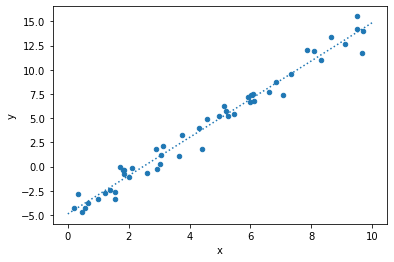

In [18]:
fig, ax = plt.subplots()
data.plot.scatter("x", "y", ax=ax)
ax.plot(x_fit, y_pred, linestyle=":")
plt.show()